In [32]:
## Import Libraries
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
import pandas as pd
from keras.initializers import RandomNormal
from keras import backend as K
from keras import optimizers,losses
from keras.layers import Dense,Activation
from keras.layers import BatchNormalization,Dropout
from keras.models import Sequential

In [33]:
## Load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Loading dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## network parameters
img_rows,img_cols = 28,28
batch_size = 128
n_epoch = 15
classes = 10
## 
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 
##
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of test examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))
    
## Normalizing the x_train dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

## one hot encode the target labels 
y_train = np_utils.to_categorical(y_train,classes)
y_test = np_utils.to_categorical(y_test,classes)

##
input_dim = x_train.shape[1]
output_dim = 10

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)
x_train shape: (60000, 784)
60000 train samples
10000 test samples


### Model1 : 2 Layer
     -- Without BN + Dropout
        1. number of hidden layers : 2
        2. optimizer : Adam
        3. Activation : Relu 
     -- With BN + Dropout 
        1. number of hidden layers : 2
        2. optimizer : Adam
        3. Activation : Relu

#### Without BN + Dropout

In [34]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(stddev=0.050))) ## he initializer sqrt(2/784) = 0.050
model.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(stddev=0.176)))## he initializer sqrt(2/64) = 0.0176
model.add(Dense(output_dim, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'] )

In [36]:
## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,verbose=1,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 25us/step - loss: 0.3552 - accuracy: 0.8990 - val_loss: 0.1816 - val_accuracy: 0.9459
Epoch 2/15
60000/60000 [==============================] - 1s 19us/step - loss: 0.1466 - accuracy: 0.9573 - val_loss: 0.1400 - val_accuracy: 0.9585
Epoch 3/15
60000/60000 [==============================] - 1s 20us/step - loss: 0.1069 - accuracy: 0.9684 - val_loss: 0.0993 - val_accuracy: 0.9684
Epoch 4/15
60000/60000 [==============================] - 1s 22us/step - loss: 0.0853 - accuracy: 0.9745 - val_loss: 0.1051 - val_accuracy: 0.9683
Epoch 5/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.0685 - accuracy: 0.9794 - val_loss: 0.0847 - val_accuracy: 0.9718
Epoch 6/15
60000/60000 [==============================] - 1s 23us/step - loss: 0.0581 - accuracy: 0.9825 - val_loss: 0.0826 - val_accuracy: 0.9750
Epoch 7/15
60000/60000 [==============================] - 1s 22us/st

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    #fig.canvas.draw()

Test score: 0.09085136720940645
Test accuracy: 0.9746000170707703


<IPython.core.display.Javascript object>


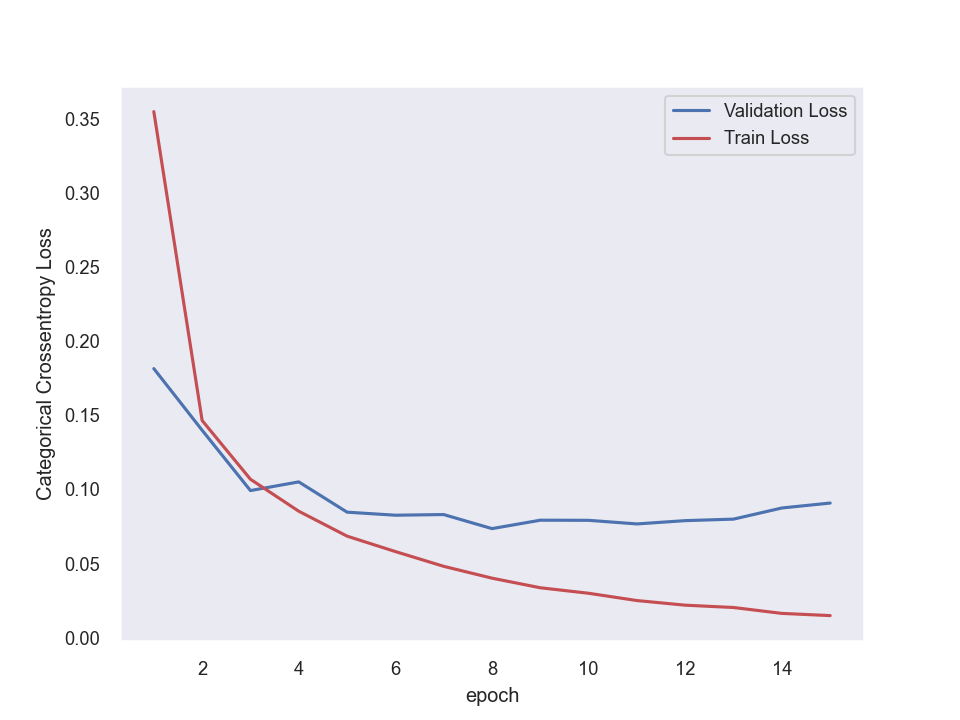

In [38]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,n_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
result = [[ty[-1],vy[-1],score[1]]]

<IPython.core.display.Javascript object>


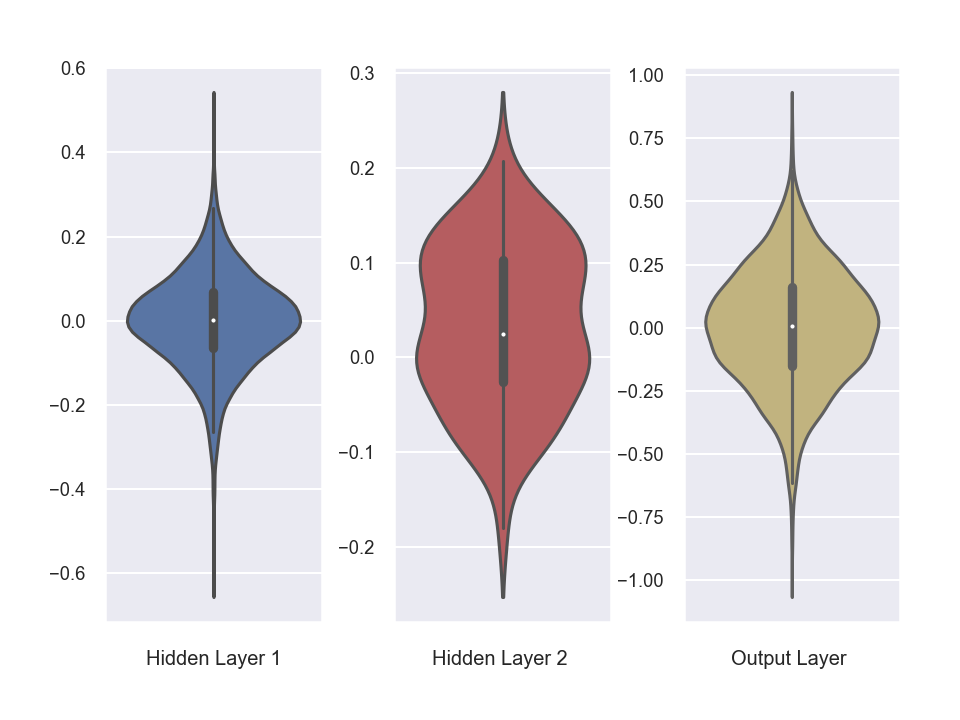

In [39]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
out_w = w_after[2].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.tight_layout(pad=3.0)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix


<IPython.core.display.Javascript object>


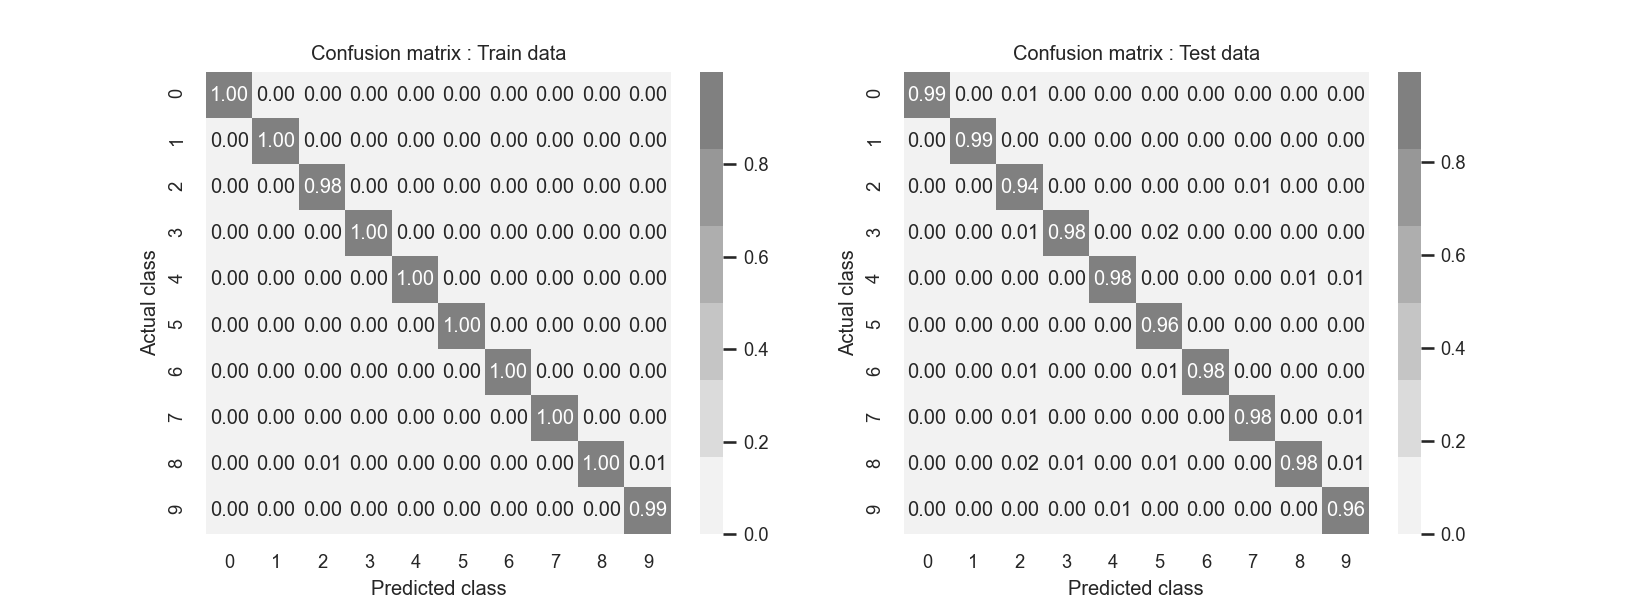

In [41]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

c=confusion_matrix(y_train.argmax(axis=1), y_train_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm1 = pd.DataFrame(normed_c, range(10), range(10))

c=confusion_matrix(y_test.argmax(axis=1), y_test_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm2 = pd.DataFrame(normed_c, range(10), range(10))

plt.figure(figsize=(11,4))
cmap=sns.light_palette("Gray")
labels =[0,1,2,3,4,5,6,7,8,9]

plt.subplot(1,2,1)
sns.set(font_scale=0.8)
sns.heatmap(df_cm1,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Train data')

plt.subplot(1,2,2)
sns.set(font_scale=0.8)
sns.heatmap(df_cm2,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Test data')
plt.show()

#### With  BN + Dropout

In [43]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(stddev=0.050))) ## he initializer sqrt(2/784) = 0.050
## add a batch normalization layer
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(stddev=0.176)))## he initializer sqrt(2/64) = 0.0176
model.add(Dense(output_dim, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 60,106
Trainable params: 59,978
Non-trainable params: 128
_________________________________________________________________


In [44]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'] )

In [45]:
## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,verbose=1,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 34us/step - loss: 0.4044 - accuracy: 0.8772 - val_loss: 0.1741 - val_accuracy: 0.9461
Epoch 2/15
60000/60000 [==============================] - 1s 25us/step - loss: 0.1974 - accuracy: 0.9403 - val_loss: 0.1314 - val_accuracy: 0.9622
Epoch 3/15
60000/60000 [==============================] - 1s 25us/step - loss: 0.1586 - accuracy: 0.9516 - val_loss: 0.1104 - val_accuracy: 0.9651
Epoch 4/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.1365 - accuracy: 0.9574 - val_loss: 0.1057 - val_accuracy: 0.9685
Epoch 5/15
60000/60000 [==============================] - 1s 25us/step - loss: 0.1226 - accuracy: 0.9610 - val_loss: 0.0920 - val_accuracy: 0.9718
Epoch 6/15
60000/60000 [==============================] - 1s 25us/step - loss: 0.1092 - accuracy: 0.9657 - val_loss: 0.0850 - val_accuracy: 0.9741
Epoch 7/15
60000/60000 [==============================] - 2s 30us/st

Test score: 0.07176502713353838
Test accuracy: 0.9778000116348267


<IPython.core.display.Javascript object>


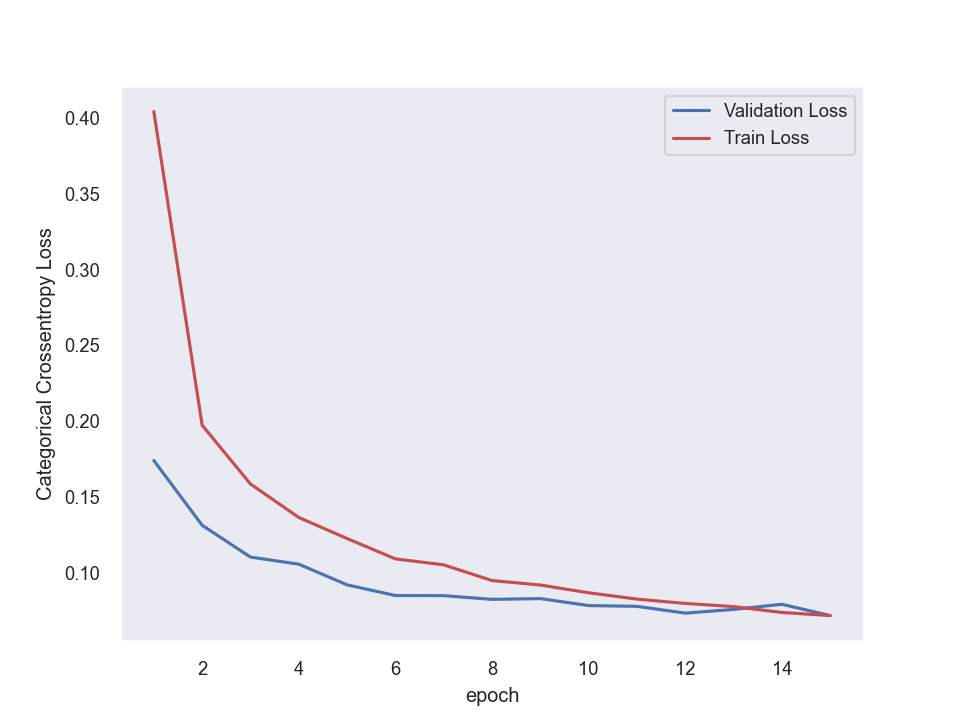

In [46]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,n_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

result.append([ty[-1],vy[-1],score[1]])

<IPython.core.display.Javascript object>


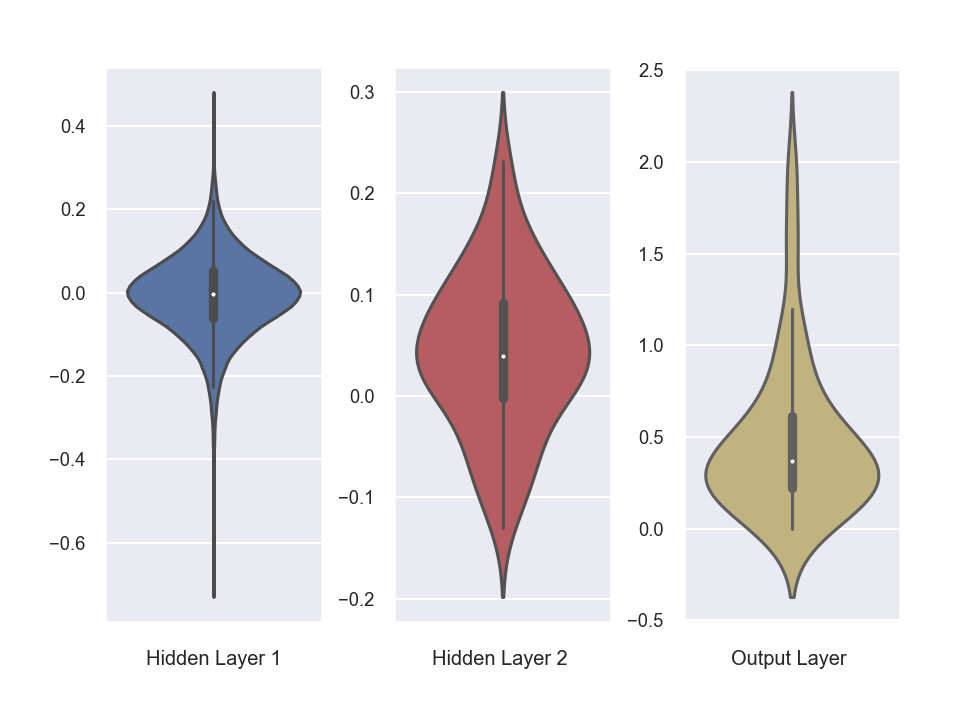

In [47]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[3].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.tight_layout(pad=3.0)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>


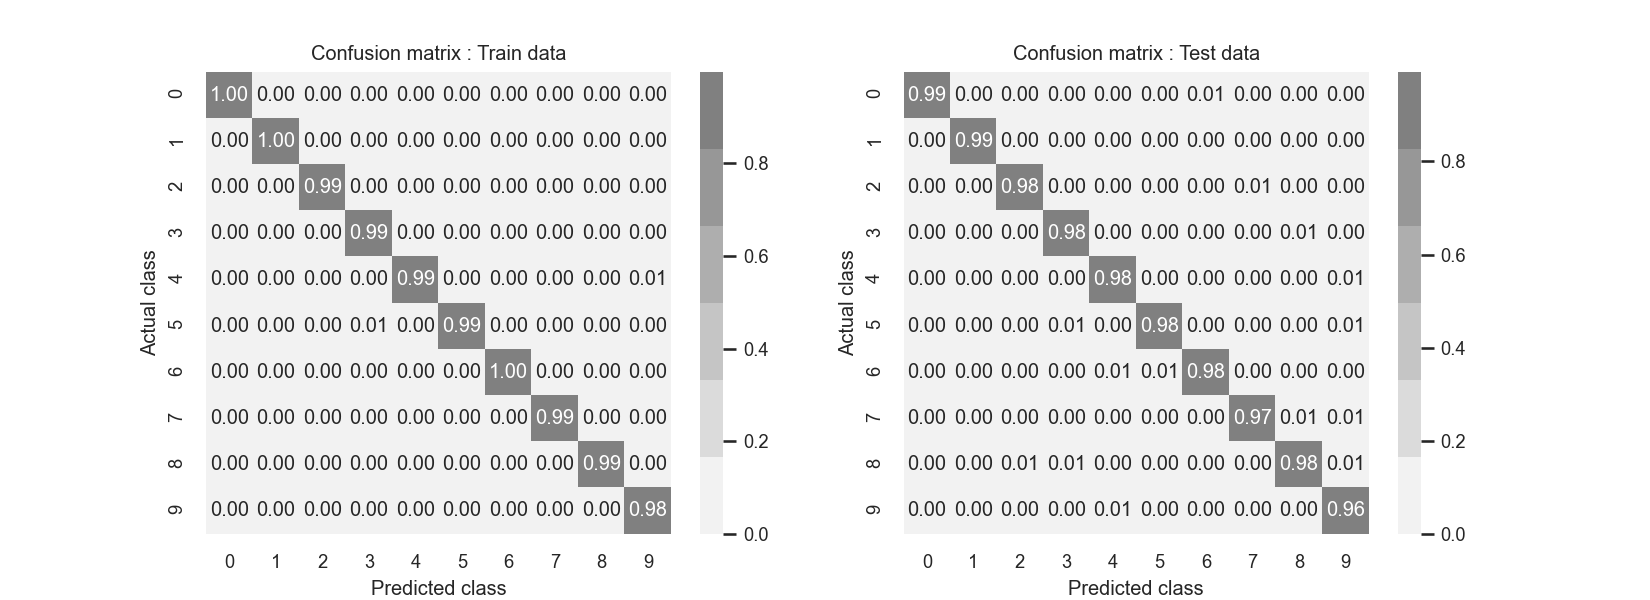

In [48]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

c=confusion_matrix(y_train.argmax(axis=1), y_train_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm1 = pd.DataFrame(normed_c, range(10), range(10))

c=confusion_matrix(y_test.argmax(axis=1), y_test_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm2 = pd.DataFrame(normed_c, range(10), range(10))

plt.figure(figsize=(11,4))
cmap=sns.light_palette("Gray")
labels =[0,1,2,3,4,5,6,7,8,9]

plt.subplot(1,2,1)
sns.set(font_scale=0.8)
sns.heatmap(df_cm1,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Train data')

plt.subplot(1,2,2)
sns.set(font_scale=0.8)
sns.heatmap(df_cm2,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Test data')
plt.show()

### Model2 : 3 Layer
     -- Without BN + Dropout
        1. number of hidden layers : 3
        2. optimizer : Adam
        3. Activation : Relu 
     -- With BN + Dropout 
        1. number of hidden layers : 3
        2. optimizer : Adam
        3. Activation : Relu

#### Without BN + Dropout

In [49]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(stddev=0.050))) ## he initializer sqrt(2/784) = 0.050
model.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(stddev=0.176)))## he initializer sqrt(2/64) = 0.0176
model.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(stddev=0.125)))## he initializer sqrt(2/128) =0.125
model.add(Dense(output_dim, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2570      
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'] )

In [51]:
## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,verbose=1,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.3039 - accuracy: 0.9090 - val_loss: 0.1508 - val_accuracy: 0.9534
Epoch 2/15
60000/60000 [==============================] - 2s 25us/step - loss: 0.1217 - accuracy: 0.9631 - val_loss: 0.1101 - val_accuracy: 0.9672
Epoch 3/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0900 - accuracy: 0.9722 - val_loss: 0.1102 - val_accuracy: 0.9670
Epoch 4/15
60000/60000 [==============================] - 2s 25us/step - loss: 0.0683 - accuracy: 0.9784 - val_loss: 0.0956 - val_accuracy: 0.9718
Epoch 5/15
60000/60000 [==============================] - 2s 29us/step - loss: 0.0544 - accuracy: 0.9826 - val_loss: 0.0962 - val_accuracy: 0.9723
Epoch 6/15
60000/60000 [==============================] - 2s 29us/step - loss: 0.0463 - accuracy: 0.9850 - val_loss: 0.0944 - val_accuracy: 0.9734
Epoch 7/15
60000/60000 [==============================] - 2s 29us/st

Test score: 0.10194387945031066
Test accuracy: 0.9757999777793884


<IPython.core.display.Javascript object>


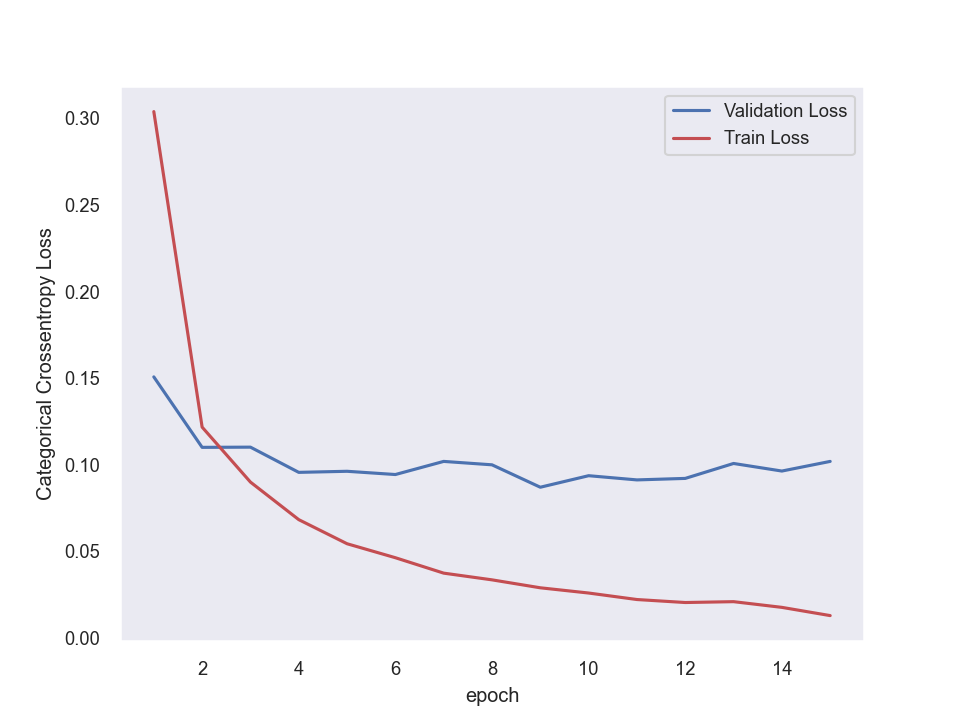

In [52]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,n_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
result.append([ty[-1],vy[-1],score[1]])

In [53]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[3].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.tight_layout(pad=3.0)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 4, 3)
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


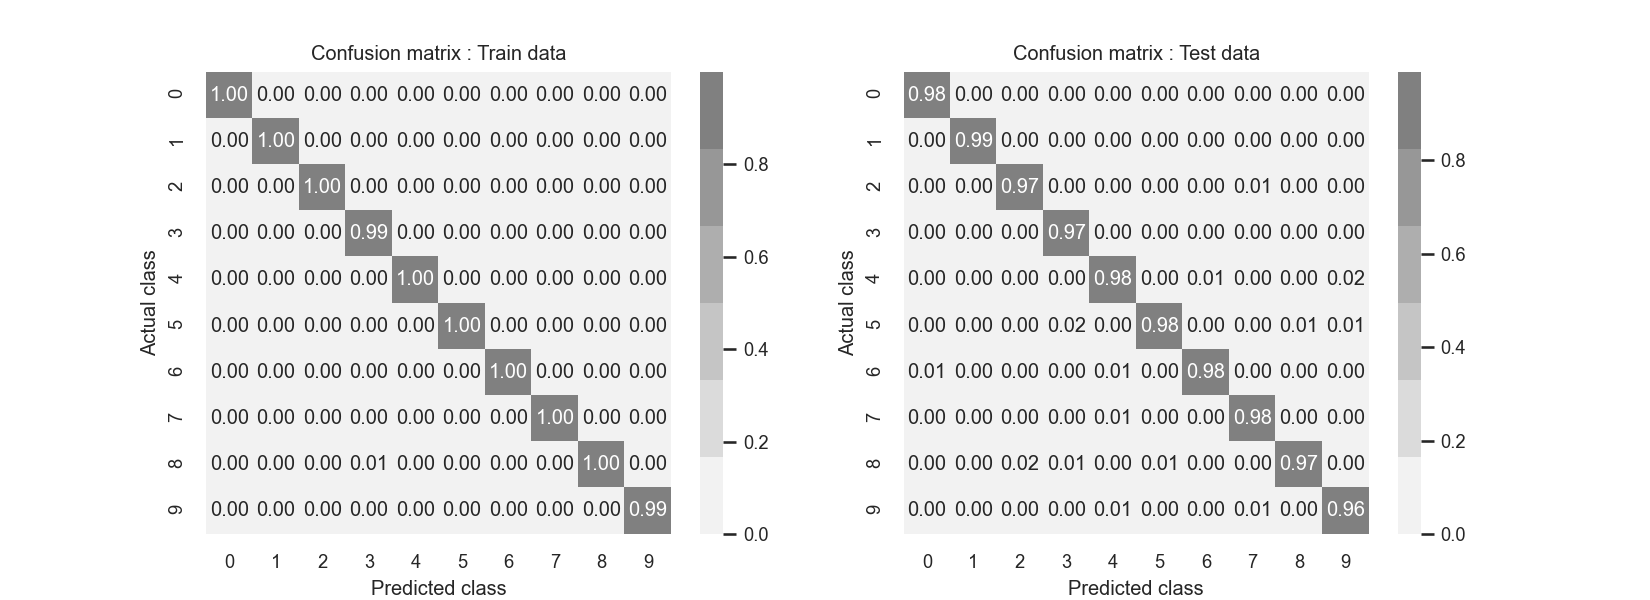

In [54]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

c=confusion_matrix(y_train.argmax(axis=1), y_train_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm1 = pd.DataFrame(normed_c, range(10), range(10))

c=confusion_matrix(y_test.argmax(axis=1), y_test_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm2 = pd.DataFrame(normed_c, range(10), range(10))

plt.figure(figsize=(11,4))
cmap=sns.light_palette("Gray")
labels =[0,1,2,3,4,5,6,7,8,9]

plt.subplot(1,2,1)
sns.set(font_scale=0.8)
sns.heatmap(df_cm1,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Train data')

plt.subplot(1,2,2)
sns.set(font_scale=0.8)
sns.heatmap(df_cm2,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Test data')
plt.show()

#### With  BN + Dropout

In [55]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(stddev=0.050))) ## he initializer sqrt(2/784) = 0.050
model.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(stddev=0.176)))## he initializer sqrt(2/64) = 0.0176
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(stddev=0.125)))## he initializer sqrt(2/128) =0.125
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)             

In [56]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'] )

In [57]:
## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,verbose=1,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 49us/step - loss: 0.5035 - accuracy: 0.8484 - val_loss: 0.1878 - val_accuracy: 0.9441
Epoch 2/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.2099 - accuracy: 0.9378 - val_loss: 0.1373 - val_accuracy: 0.9581
Epoch 3/15
60000/60000 [==============================] - 3s 44us/step - loss: 0.1568 - accuracy: 0.9530 - val_loss: 0.1114 - val_accuracy: 0.9670
Epoch 4/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.1249 - accuracy: 0.9621 - val_loss: 0.1089 - val_accuracy: 0.9676
Epoch 5/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.1061 - accuracy: 0.9679 - val_loss: 0.1072 - val_accuracy: 0.9670
Epoch 6/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.0925 - accuracy: 0.9715 - val_loss: 0.0965 - val_accuracy: 0.9694
Epoch 7/15
60000/60000 [==============================] - 3s 46us/st

Test score: 0.10004436637778999
Test accuracy: 0.9739000201225281


<IPython.core.display.Javascript object>


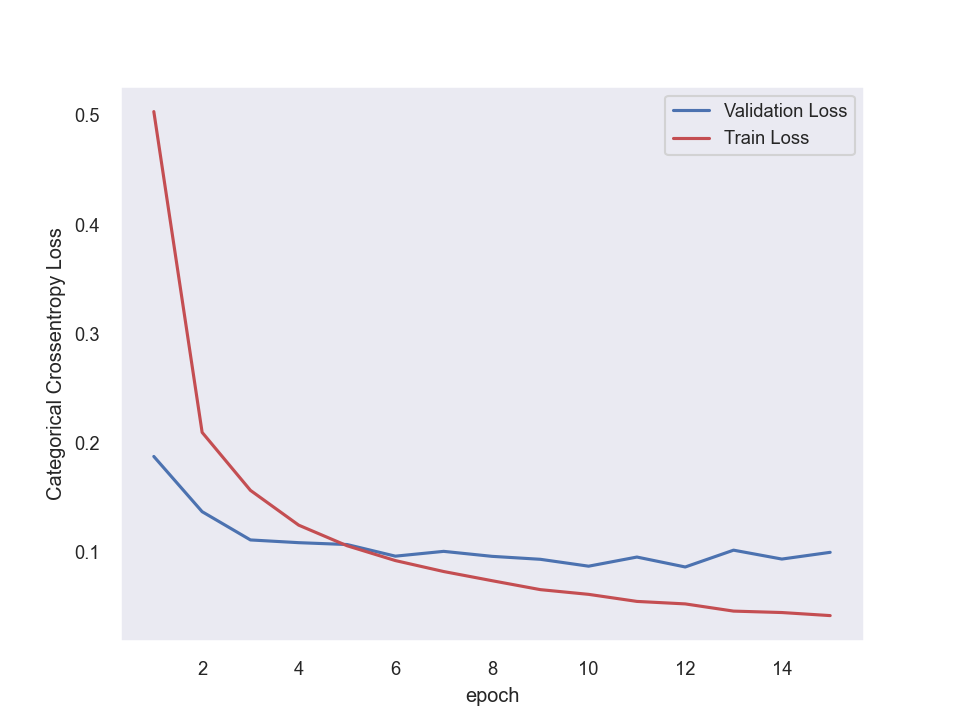

In [58]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,n_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
result.append([ty[-1],vy[-1],score[1]])

<IPython.core.display.Javascript object>


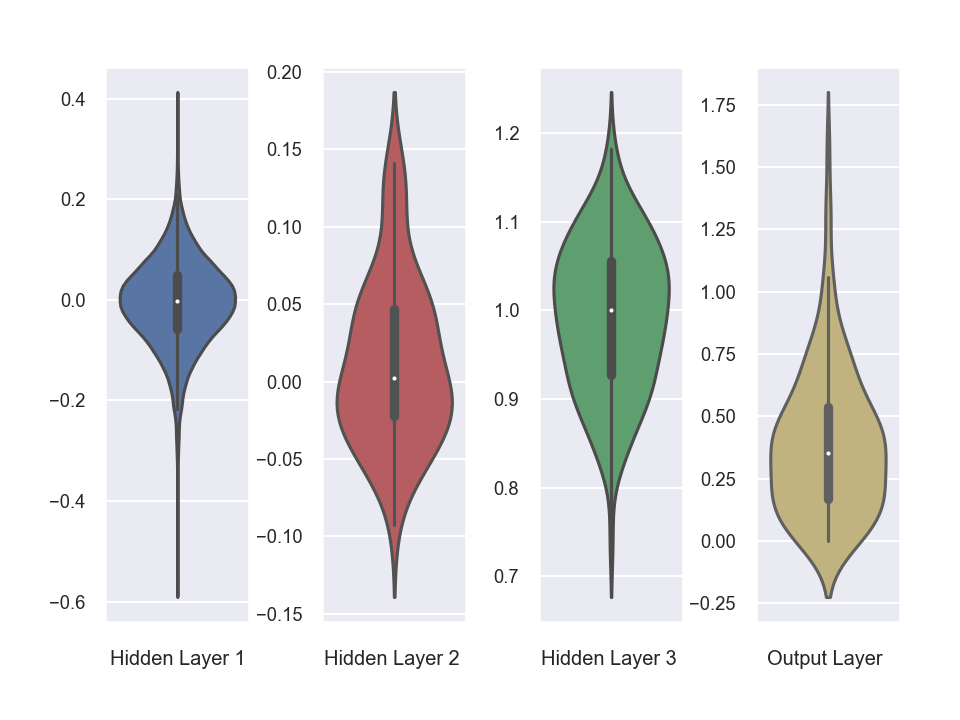

In [59]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[7].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.tight_layout(pad=3.0)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 4, 3)
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>


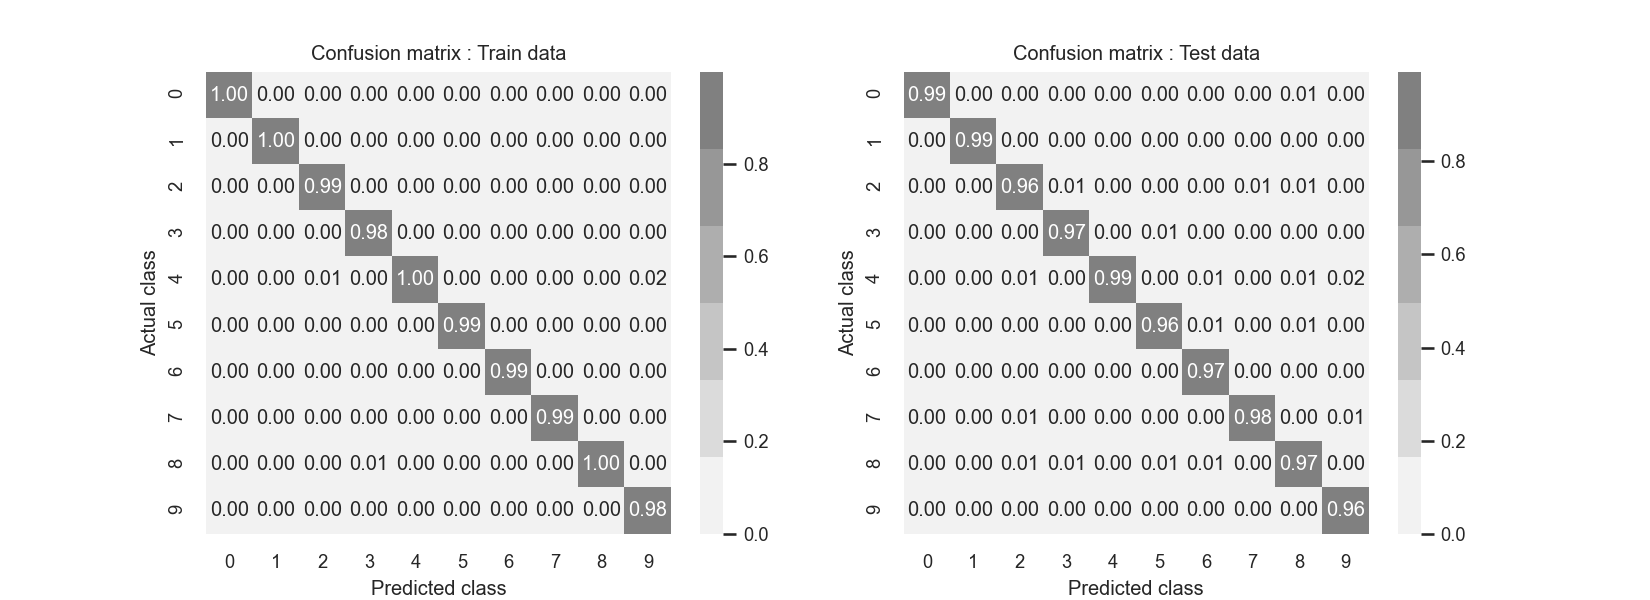

In [60]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

c=confusion_matrix(y_train.argmax(axis=1), y_train_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm1 = pd.DataFrame(normed_c, range(10), range(10))

c=confusion_matrix(y_test.argmax(axis=1), y_test_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm2 = pd.DataFrame(normed_c, range(10), range(10))

plt.figure(figsize=(11,4))
cmap=sns.light_palette("Gray")
labels =[0,1,2,3,4,5,6,7,8,9]

plt.subplot(1,2,1)
sns.set(font_scale=0.8)
sns.heatmap(df_cm1,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Train data')

plt.subplot(1,2,2)
sns.set(font_scale=0.8)
sns.heatmap(df_cm2,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Test data')
plt.show()

### Model3 : 5 Layer
     -- Without BN + Dropout
        1. number of hidden layers : 5
        2. optimizer : Adam
        3. Activation : Relu 
     -- With BN + Dropout 
        1. number of hidden layers : 5
        2. optimizer : Adam
        3. Activation : Relu

#### Without BN + Dropout

In [64]:
model = Sequential()
model.add(Dense(32, activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(stddev=0.125)))## he initializer sqrt(2/784) =0.050
model.add(Dense(64, activation='relu',kernel_initializer=RandomNormal(stddev=0.25))) ## he initializer sqrt(2/32) = 0.25
model.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(stddev=0.176)))## he initializer sqrt(2/64) = 0.17
model.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(stddev=0.125)))## he initializer sqrt(2/128) =0.125
model.add(Dense(512, activation='relu',kernel_initializer=RandomNormal(stddev=0.088)))## he initializer sqrt(2/256) =0.088
model.add(Dense(output_dim, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_46 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_47 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_48 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_49 (Dense)             (None, 10)                5130      
Total params: 205,290
Trainable params: 205,290
Non-trainable params: 0
_______________________________________________

In [65]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'] )

In [66]:
## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,verbose=1,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.3952 - accuracy: 0.8754 - val_loss: 0.2033 - val_accuracy: 0.9386
Epoch 2/15
60000/60000 [==============================] - 3s 45us/step - loss: 0.1660 - accuracy: 0.9489 - val_loss: 0.1436 - val_accuracy: 0.9562
Epoch 3/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.1186 - accuracy: 0.9630 - val_loss: 0.1268 - val_accuracy: 0.9611
Epoch 4/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.0954 - accuracy: 0.9689 - val_loss: 0.1218 - val_accuracy: 0.9618
Epoch 5/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.0781 - accuracy: 0.9744 - val_loss: 0.1234 - val_accuracy: 0.9631
Epoch 6/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.0639 - accuracy: 0.9795 - val_loss: 0.1328 - val_accuracy: 0.9635
Epoch 7/15
60000/60000 [==============================] - 3s 51us/st

Test score: 0.13321278729955158
Test accuracy: 0.9697999954223633


<IPython.core.display.Javascript object>


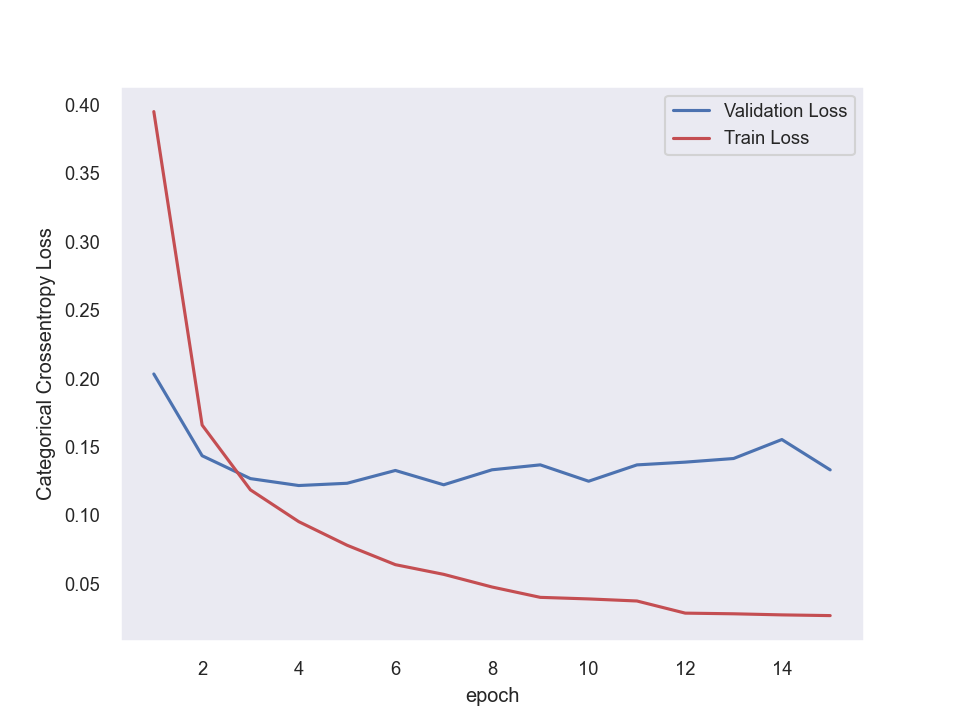

In [67]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,n_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
result.append([ty[-1],vy[-1],score[1]])

<IPython.core.display.Javascript object>


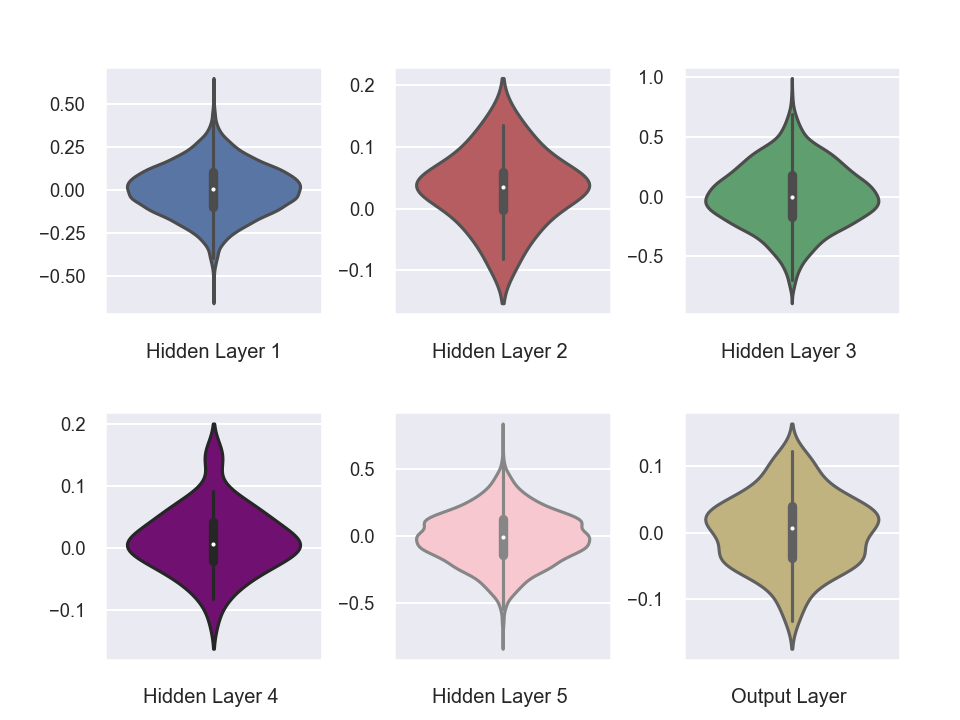

In [68]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
h4_w = w_after[3].flatten().reshape(-1,1)
h5_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[5].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.tight_layout(pad=3.0)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(2, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(2, 3,3)
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(2, 3, 4)
ax = sns.violinplot(y=h4_w,color='purple')
plt.xlabel('Hidden Layer 4 ')
plt.subplot(2, 3, 5)
ax = sns.violinplot(y=h5_w,color='pink')
plt.xlabel('Hidden Layer 5 ')
plt.subplot(2, 3, 6)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>


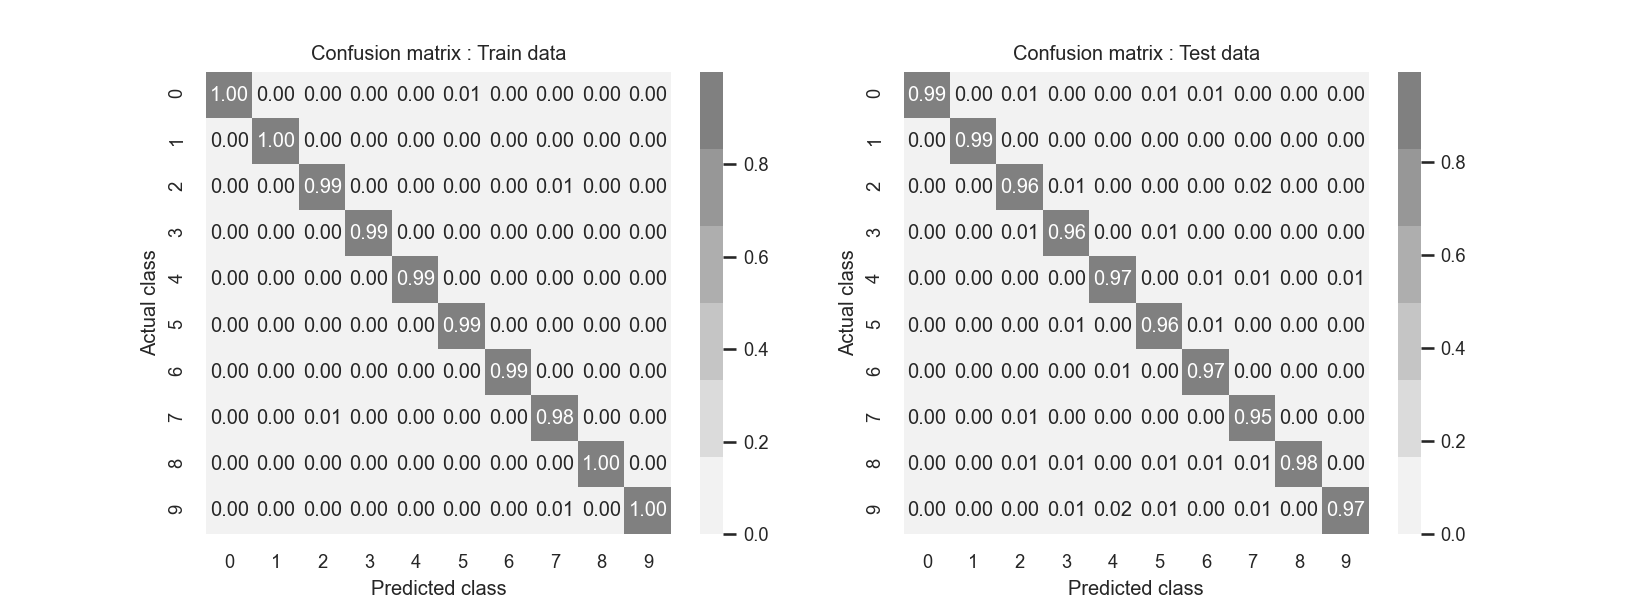

In [69]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

c=confusion_matrix(y_train.argmax(axis=1), y_train_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm1 = pd.DataFrame(normed_c, range(10), range(10))

c=confusion_matrix(y_test.argmax(axis=1), y_test_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm2 = pd.DataFrame(normed_c, range(10), range(10))

plt.figure(figsize=(11,4))
cmap=sns.light_palette("Gray")
labels =[0,1,2,3,4,5,6,7,8,9]

plt.subplot(1,2,1)
sns.set(font_scale=0.8)
sns.heatmap(df_cm1,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Train data')

plt.subplot(1,2,2)
sns.set(font_scale=0.8)
sns.heatmap(df_cm2,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Test data')
plt.show()

#### With  BN + Dropout

In [70]:
model = Sequential()
model.add(Dense(32, activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(stddev=0.125)))## he initializer sqrt(2/784) =0.050
model.add(Dense(64, activation='relu',kernel_initializer=RandomNormal(stddev=0.25))) ## he initializer sqrt(2/32) = 0.25
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu',kernel_initializer=RandomNormal(stddev=0.176)))## he initializer sqrt(2/64) = 0.17
model.add(Dense(256, activation='relu',kernel_initializer=RandomNormal(stddev=0.125)))## he initializer sqrt(2/128) =0.125
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu',kernel_initializer=RandomNormal(stddev=0.088)))## he initializer sqrt(2/256) =0.088
model.add(Dense(output_dim, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)             

In [71]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'] )

In [72]:
## train the model
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=n_epoch,verbose=1,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 73us/step - loss: 0.7466 - accuracy: 0.7624 - val_loss: 0.2717 - val_accuracy: 0.9167
Epoch 2/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.3306 - accuracy: 0.9003 - val_loss: 0.1889 - val_accuracy: 0.9417
Epoch 3/15
60000/60000 [==============================] - 4s 65us/step - loss: 0.2539 - accuracy: 0.9233 - val_loss: 0.1583 - val_accuracy: 0.9512
Epoch 4/15
60000/60000 [==============================] - 4s 70us/step - loss: 0.2121 - accuracy: 0.9358 - val_loss: 0.1483 - val_accuracy: 0.9551
Epoch 5/15
60000/60000 [==============================] - 4s 65us/step - loss: 0.1865 - accuracy: 0.9438 - val_loss: 0.1416 - val_accuracy: 0.9575
Epoch 6/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.1720 - accuracy: 0.9475 - val_loss: 0.1279 - val_accuracy: 0.9596
Epoch 7/15
60000/60000 [==============================] - 4s 72us/st

Test score: 0.10790942553719506
Test accuracy: 0.970300018787384


<IPython.core.display.Javascript object>


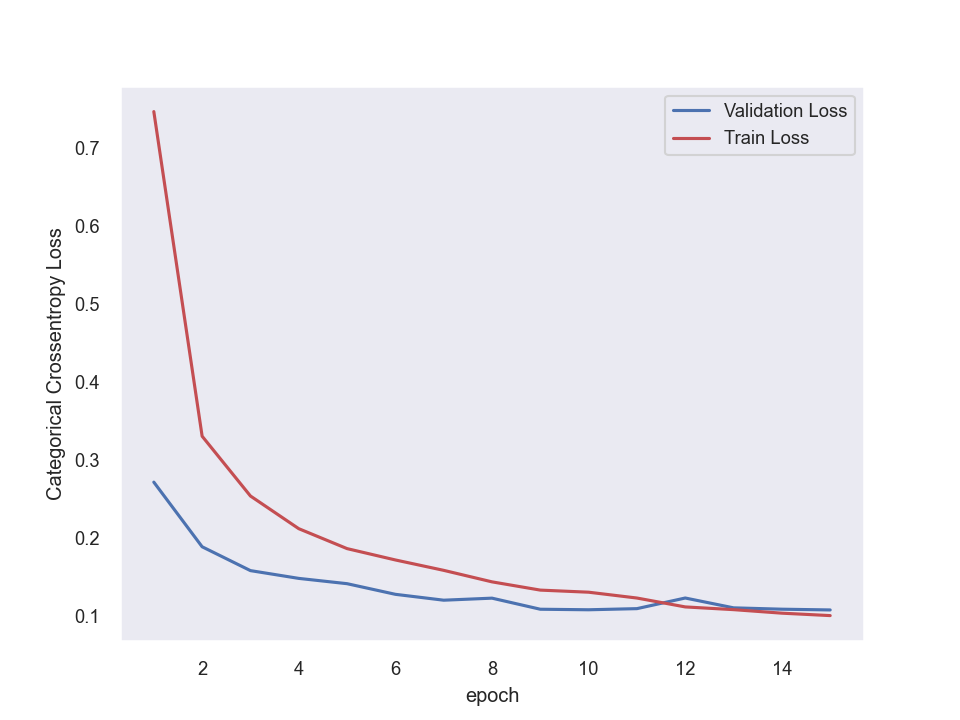

In [73]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,n_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
result.append([ty[-1],vy[-1],score[1]])

<IPython.core.display.Javascript object>


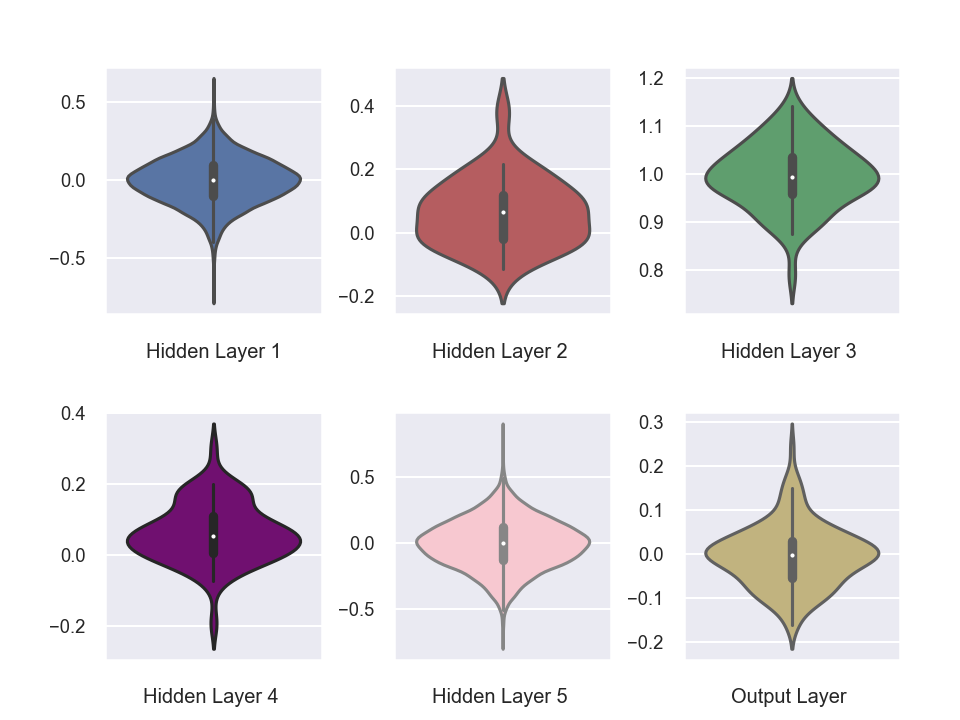

In [77]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[5].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[9].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.tight_layout(pad=3.0)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(2, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(2, 3,3)
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3 ')
plt.subplot(2, 3, 4)
ax = sns.violinplot(y=h4_w,color='purple')
plt.xlabel('Hidden Layer 4 ')
plt.subplot(2, 3, 5)
ax = sns.violinplot(y=h5_w,color='pink')
plt.xlabel('Hidden Layer 5 ')
plt.subplot(2, 3, 6)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>


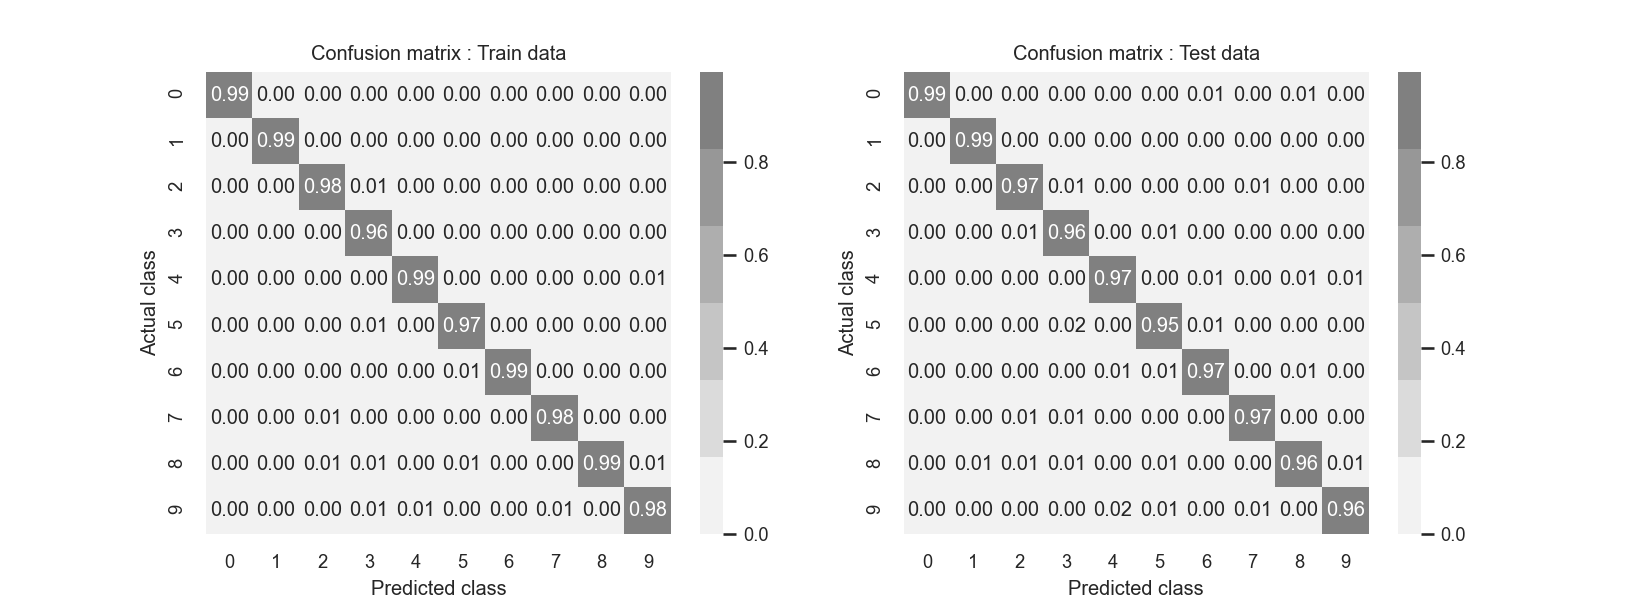

In [75]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

c=confusion_matrix(y_train.argmax(axis=1), y_train_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm1 = pd.DataFrame(normed_c, range(10), range(10))

c=confusion_matrix(y_test.argmax(axis=1), y_test_predict.argmax(axis=1))
normed_c = c.T / c.astype(np.float).sum(axis=1).T
df_cm2 = pd.DataFrame(normed_c, range(10), range(10))

plt.figure(figsize=(11,4))
cmap=sns.light_palette("Gray")
labels =[0,1,2,3,4,5,6,7,8,9]

plt.subplot(1,2,1)
sns.set(font_scale=0.8)
sns.heatmap(df_cm1,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Train data')

plt.subplot(1,2,2)
sns.set(font_scale=0.8)
sns.heatmap(df_cm2,annot=True,fmt=".2f",xticklabels=labels,yticklabels=labels,cmap=cmap)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion matrix : Test data')
plt.show()

In [78]:
##http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "Number of Layer",'Batch Normalization and Drop out','Train-loss','Test-Loss',"Test-Accuracy"]

x.add_row(["Model 1",2,'no',round(result[0][0],2),round(result[0][1],2),round(result[0][2] ,2)])
x.add_row(["Model 1",2,'yes',round(result[1][0],2),round(result[1][1],2),round(result[1][2] ,2)])
x.add_row(["Model 2",3,'no',round(result[2][0],2),round(result[2][1],2),round(result[2][2],2)])
x.add_row(["Model 2",3,'yes',round(result[3][0],2),round(result[3][1],2),round(result[3][2] ,2)])
x.add_row(["Model 3",5,'no',round(result[4][0],2),round(result[4][1],2),round(result[4][2],2)])
x.add_row(["Model 3",5,'yes',round(result[5][0],2),round(result[5][1],2),round(result[5][2],2)])
print(x)

+---------+-----------------+----------------------------------+------------+-----------+---------------+
|  Model  | Number of Layer | Batch Normalization and Drop out | Train-loss | Test-Loss | Test-Accuracy |
+---------+-----------------+----------------------------------+------------+-----------+---------------+
| Model 1 |        2        |                no                |    0.01    |    0.09   |      0.97     |
| Model 1 |        2        |               yes                |    0.07    |    0.07   |      0.98     |
| Model 2 |        3        |                no                |    0.01    |    0.1    |      0.98     |
| Model 2 |        3        |               yes                |    0.04    |    0.1    |      0.97     |
| Model 3 |        5        |                no                |    0.03    |    0.13   |      0.97     |
| Model 3 |        5        |               yes                |    0.1     |    0.11   |      0.97     |
+---------+-----------------+-----------------

## OBSERVATIONS :
    * Since Mnist is a simple dataset we get optimum accuracy with 2 layers itself.
    * As the number of layers increases  model converges faster at early epochs.
    * Adding drop out and batch normalization layers avoids overfitting on data.
    * Layer weights are not too small or too large to cause slow convergence .
    * Number of true positives on test data improved from layer 2 to layer 5